## Описание проекта

<div style="border: 1px solid; padding: 20px">
<i> Игра содержит особое событие – ивент, для прохождения которого пользователи могут тратить деньги. Группа дизайнеров решила поменять вид окошка покупки ивентовых продуктов. Чтобы оценить результат нововведения, провели АВ-тест, разделив пользователей на две группы: контрольную и тестовую (с окошком нового типа).</i>
   
**Задача:**
<br>Исследовать какая из АВ групп лучше себя показала. Результаты предоставить в понятной для широкой аудитории форме сопроводив по необходимости графиками/дашбордами/числами.
</div>

## Описание данных

**Скачать данные:** `https://drive.google.com/file/d/1ynnyIKbT64yoi0IpMd_Gs3I-n1m61QT-/view?usp=sharing`
***
Файл `/test_task_product_analyst_2021_20210427.csv`

- `AbGroup` – имя АВ группы: Control/Test
- `user_id` – id пользователя
- `time_stamp` – день события
- `install_date` – день установки приложения пользователем
- `event_name` – техническое название события (InAppPurchase - покупка за деньги, ResourceSpend - покупка за игровую валюту)
- `platform` – платформа google/itunes
- `network_name` – пользователь установил игру по переходу с рекламы (Paid) или нет (Organic)
- `country_name` – страна пользователя
- `InGameTime` – сколько всего пользователь провел в игре секунд
- `LastCompletedLevel` – номер последнего пройденного уровня
- `avg_energy_amount` – сколько в среднем энергии было у пользователя за день
- `revenue_on_event` – ревеню, потраченное на покупку ивентовых продуктов
- `revenue_on_other_activities` – ревеню, потраченное на остальные продукты, включая золото
- `gold_on_event` – золото, потраченное на ивентный прогресс
- `gold_on_other_activities` – золото, потраченное на другие продукты

# Изучение и предобработка данных

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import statsmodels.api as sm
from tqdm.notebook import tqdm

In [2]:
pth = 'test_task_product_analyst_2021_20210427.csv'

if os.path.exists(pth):
    data = pd.read_csv(pth)
else:
    print('Не могу найти путь к файлу')
        
display(data)

,AbGroup,user_id,time_stamp,install_date,event_name,platform,network_name,country_name,InGameTime,LastCompletedLevel,avg_energy_amount,revenue_on_event,revenue_on_other_activities,gold_on_event,gold_on_other_activities
0,Control,d60ebcaecff2dc1d360a8a41271e6fd8a902c107,2020-02-10,2019-11-10,ResourceSpend,itunes,Organic,United Kingdom of Great Britain and Northern I...,276180,345,54.0,0.0,0.0,NaN,NaN
1,Test,f6e385b0ab43d5aea9cfcc408aa84029a4ea5fdb,2020-03-04,2019-11-05,ResourceSpend,itunes,Paid,United States of America,166095,199,50.0,0.0,0.0,NaN,NaN
2,Control,a4c80c8524e2c11cc238553d7b02da01ce2aad66,2020-02-26,2020-01-02,ResourceSpend,itunes,Paid,Canada,240986,84,39.0,0.0,0.0,NaN,NaN
3,Control,7ea2e4599ae33760c307e254839317bd5b17a63c,2020-02-21,2020-01-13,ResourceSpend,itunes,Organic,France,989822,1176,21.0,0.0,0.0,NaN,NaN
4,Control,6495168982929360dc6d84bf0766d8963a7ddc41,2020-02-18,2020-02-05,ResourceSpend,itunes,Paid,Spain,52106,66,43.0,0.0,0.0,500.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696835,Control,cb394bfaa14de91ca99f566e1cede909285dc338,2020-03-01,2019-11-03,ResourceSpend,itunes,Paid,Canada,73805,101,23.0,0.0,0.0,NaN,NaN
696836,Test,b61b6d950bc376fc23581fa9c8e4d3c75d2dcd9a,2020-03-04,2020-01-03,ResourceSpend,itunes,Organic,Spain,733369,415,62.0,0.0,0.0,NaN,NaN
696837,Control,be989a271b16dfa4e9ac2d877a07ce0f2fdb456c,2020-02-29,2019-01-13,ResourceSpend,itunes,Organic,Germany,75273,331,22.0,0.0,0.0,NaN,NaN
696838,Control,5435fa8319c96097de76557f077659ce4f187262,2020-02-28,2019-02-14,ResourceSpend,itunes,Organic,Germany,908230,1287,58.0,0.0,0.0,NaN,NaN


In [3]:
data.info()

# сохраним количество строк в датафрейме до предобработки (это значение понадобится нам позже)
df_row_number = data.shape[0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696840 entries, 0 to 696839
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   AbGroup                      696840 non-null  object 
 1   user_id                      696840 non-null  object 
 2   time_stamp                   696840 non-null  object 
 3   install_date                 696840 non-null  object 
 4   event_name                   696840 non-null  object 
 5   platform                     696840 non-null  object 
 6   network_name                 696840 non-null  object 
 7   country_name                 696840 non-null  object 
 8   InGameTime                   696840 non-null  int64  
 9   LastCompletedLevel           696840 non-null  int64  
 10  avg_energy_amount            696840 non-null  float64
 11  revenue_on_event             696840 non-null  float64
 12  revenue_on_other_activities  696840 non-null  float64
 13 

In [4]:
# переименуем столбцы
data = data.rename(columns={'AbGroup': 'ab_group',
                            'InGameTime': 'in_game_time',
                            'LastCompletedLevel': 'last_completed_level'})

In [5]:
# приведем столбцы time_stamp и install_date к формату datetime64 
data['time_stamp'] = pd.to_datetime(data['time_stamp'], format='%Y-%m-%d')
data['install_date'] = pd.to_datetime(data['install_date'], format='%Y-%m-%d')

In [6]:
# посмотрим на количество пропусков в данных
data.isna().sum()

ab_group                            0
user_id                             0
time_stamp                          0
install_date                        0
event_name                          0
platform                            0
network_name                        0
country_name                        0
in_game_time                        0
last_completed_level                0
avg_energy_amount                   0
revenue_on_event                    0
revenue_on_other_activities         0
gold_on_event                  651428
gold_on_other_activities       528647
dtype: int64

In [7]:
# поставим нули там, где не указано количество потраченного золота
data['gold_on_event'] = data['gold_on_event'].fillna(0)
data['gold_on_other_activities'] = data['gold_on_other_activities'].fillna(0)

In [8]:
# проверим наличие явнях дубликатов в данных
print('Общее количество дубликатов: {}'.format(data.duplicated().sum()))

Общее количество дубликатов: 0


In [9]:
# проверим колонку country_name на неявные дубликаты, отсортируем в алфавитном порядке
np.sort(data.country_name.unique())

array(['Albania', 'Algeria', 'Andorra', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Brazil', 'Bulgaria', 'Canada', 'China', 'Colombia', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Estonia', 'Ethiopia', 'Finland', 'France', 'French Guiana',
       'Georgia', 'Germany', 'Gibraltar', 'Greece', 'Guadeloupe',
       'Guernsey', 'Guinea', 'Hong Kong', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran (Islamic Republic of)', 'Iraq', 'Ireland',
       'Isle of Man', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jersey',
       'Jordan', 'Kazakhstan', 'Kenya', 'Korea (Republic of)', 'Kuwait',
       'Latvia', 'Lebanon', 'Liechtenstein', 'Lithuania', 'Luxembourg',
       'Macao', 'Macedonia (the f

In [10]:
# напишем функцию, которая будет выводить уникальные значения для указанного столбца в данных
def np_sort_col(parametr_list):
    for i in range(len(parametr_list)):
        print('Уникальные значения колонки', parametr_list[i] + ':', np.sort(data[parametr_list[i]].unique()))

In [11]:
# посмотрим на колонки ab_group, event_name, platform и network_name
np_sort_col(['ab_group', 'event_name', 'platform', 'network_name'])

Уникальные значения колонки ab_group: ['Control' 'Test']
Уникальные значения колонки event_name: ['ResourceSpend']
Уникальные значения колонки platform: ['itunes']
Уникальные значения колонки network_name: ['Organic' 'Paid']


В описании данных заявлено, что `event_name` хранит два типа событий (InAppPurchase и ResourceSpend), однако в выгрузке присутствует только ResourceSpend. Аналогичная ситуация и с типом платформы в `platform`, в выгрузке есть только itunes.

In [12]:
# проверим, не попали ли одни и те же пользователи в разные группы АВ-теста 
id_by_group = data[['user_id', 'ab_group']]\
                                    .groupby('user_id', as_index=False)\
                                    .agg({'ab_group': 'nunique'})
id_by_group = id_by_group[id_by_group['ab_group'] == 2].reset_index(drop=True)
user_id_list = id_by_group['user_id'].tolist()
id_to_fix = data.query('user_id in @user_id_list')\
                        .groupby(['user_id', 'ab_group'])\
                        .agg({'time_stamp': 'count'})\
                        .rename(columns = {'time_stamp': 'game_events'})
display(id_to_fix)

game_events
user_id                                  ab_group             
007a61c7cc84aa559280c6d222aa3e15cb5e0114 Control            19
                                         Test                1
007c891d5eb34c1398966a836d74a123452384de Control             2
                                         Test                1
02125379d8faf43debf755edfb32758ea5d789d8 Control             1
...                                                        ...
fef449646b98d04def88b9ddb45e7c43bd9a278a Test                1
ff079e7288b379b4e47650da302a5cc23e8c7ad3 Control             5
                                         Test                1
ff816e78735bba9ef1d63f46e4614754e2aaeff6 Control             1
                                         Test                2

[704 rows x 1 columns]

In [13]:
print('Пользователей в ходе проведения АВ-теста попали в обе группы: {}'.format(id_by_group['user_id'].nunique()))

Пользователей в ходе проведения АВ-теста попали в обе группы: 352


In [14]:
print('В группу "Control" попало {} пользователя'.format(data[data['ab_group'] == "Control"]['user_id'].nunique()))
print('В группу "Test" попало {} пользователей'.format(data[data['ab_group'] == "Test"]['user_id'].nunique()))

В группу "Control" попало 89034 пользователя
В группу "Test" попало 22278 пользователей


В ходе проведения эксперимента, скорее всего, на группы разделялись не пользователи оп user_id, а пользовательские сессии или события (отмеченные в time_stamp), по этой причине одни и те же пользователи могли попасть в различные группы при тестировании. Таких пользователей стоит исключить из анализа, так как они могут исказить результаты эксперимента.

In [15]:
# отфильтруем данные по пользователям
data_filtered = data.query('user_id not in @user_id_list').reset_index(drop=True)

In [16]:
# посмотрим на даты начала и конца теста
print('Дата начала теста: {}'.format(data_filtered['time_stamp'].min()))
print('Дата окончания теста: {}'.format(data_filtered['time_stamp'].max()))

Дата начала теста: 2020-02-09 00:00:00
Дата окончания теста: 2020-03-04 00:00:00


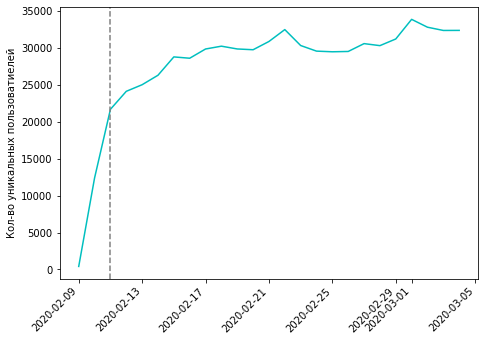

In [17]:
# посмотрим на количество пользователей по дням эксперимента
plot_data = data_filtered.groupby('time_stamp', as_index=False)['user_id'].nunique()

plt.figure(figsize=(7.5, 5))
plt.plot(plot_data['time_stamp'], plot_data['user_id'], color='c')
plt.xticks(rotation=45, ha='right')
plt.axvline(x=18303, color='gray', linestyle='--')
plt.ylabel('Кол-во уникальных пользоватиелей');

Судя по графику можно видеть неоднородность в данных в первые дни. Полными данными мы располагаем только с 2020-02-11 (видимо, это дата стата игрового ивента), более ранние данные придется отбросить.

In [18]:
# отфильтруем данные по дате
data_filtered = data_filtered.query('time_stamp >= "2020-02-11"').reset_index(drop=True)

In [19]:
# посчитаем, сколько данных мы потеряли на этапе фильтрации 
print('~{0:.2%} данных сохранено после фильтрации'.format(data_filtered.shape[0]/df_row_number))

~97.82% данных сохранено после фильтрации


# Исследовательский анализ данных

network_name,Organic,Paid
ab_group,,
Control,31746,56159
Test,7819,13915


Соотношение "Control"/"Test" из network_name: ~ 4.06 Organic к ~ 4.04 Paid


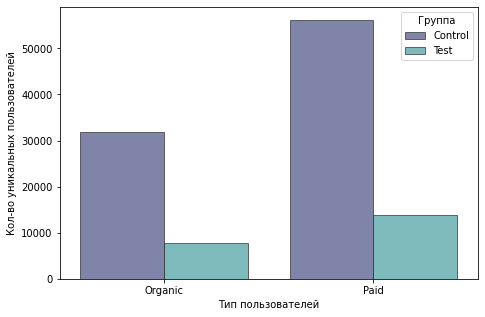

In [20]:
# посмотрим как в тестовой и контрольной групее представлены пользователи с разным типом привлечения
network_name_by_group = data_filtered.pivot_table(values='user_id', index='ab_group', columns='network_name', aggfunc='nunique')
display(network_name_by_group)

print('Соотношение "Control"/"Test" из network_name: ~',
     (network_name_by_group['Organic']['Control']/network_name_by_group['Organic']['Test']).round(2), 'Organic к ~',
     (network_name_by_group['Paid']['Control']/network_name_by_group['Paid']['Test']).round(2), 'Paid')

plt.figure(figsize=(7.5, 5))

sns.barplot(data=data_filtered.groupby(['network_name', 'ab_group'])
                              .agg({'user_id': 'nunique'}).reset_index(), 
            y='user_id', 
            x='network_name', 
            hue='ab_group', 
            alpha=.7,
            palette = "mako",
            edgecolor='.2')
plt.legend(title='Группа')
plt.xlabel('Тип пользователей')
plt.ylabel('Кол-во уникальных пользователей');

Соотношение групп в тесте и в контроле практически одинаковое. По параметру network_name тестовая группа соответствует контрольной.

In [21]:
# посмотрим как в тестовой и контрольной групее представлены пользователи из различных стран
country_name_by_group = data_filtered.groupby(['country_name', 'ab_group']).agg({'user_id': 'nunique'})
display(country_name_by_group)

user_id
country_name                                       ab_group         
Albania                                            Control         6
                                                   Test            1
Algeria                                            Control         1
                                                   Test            1
Andorra                                            Control         4
...                                                              ...
United Kingdom of Great Britain and Northern Ir... Test         6023
United States of America                           Control       159
                                                   Test           44
Uzbekistan                                         Test            1
Viet Nam                                           Control         2

[176 rows x 1 columns]

In [22]:
# определим страны в которых аудитория не менее 100 пользователей в контрольной группе
country_name_list = country_name_by_group.query('ab_group == "Control" and user_id >= 100').reset_index().country_name.tolist()
country_name_list

['Canada',
 'Czech Republic',
 'France',
 'Germany',
 'Spain',
 'United Kingdom of Great Britain and Northern Ireland',
 'United States of America']

user_id
country_name   ab_group         
Canada         Control     11292
               Test         2841
Czech Republic Control      1415
               Test          339
France         Control     18688
               Test         4595
Germany        Control     21847
               Test         5372
Spain          Control      9860
               Test         2460
UK             Control     24414
               Test         6023
USA            Control       159
               Test           44

Соотношение "Control"/"Test" из основных country_name: ~ 4.0 Canada к ~ 4.2 Czech Republic к ~ 4.1 France к ~ 4.1 Germany к ~ 4.0 Spain к ~ 4.1 UK к ~ 3.6 USA


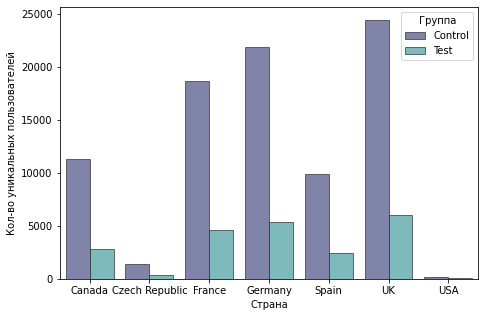

In [23]:
# отфильтруем таблицу country_name_by_group
country_name_by_group_filtered = country_name_by_group.query('country_name in @country_name_list')\
                                                      .rename(index={'United Kingdom of Great Britain and Northern Ireland': 'UK',
                                                                     'United States of America': 'USA'})
display(country_name_by_group_filtered)

print('Соотношение "Control"/"Test" из основных country_name: ~',
      (country_name_by_group_filtered['user_id']['Canada']['Control']/country_name_by_group_filtered['user_id']['Canada']['Test']).round(1), 'Canada к ~',
      (country_name_by_group_filtered['user_id']['Czech Republic']['Control']/country_name_by_group_filtered['user_id']['Czech Republic']['Test']).round(1), 'Czech Republic к ~',
      (country_name_by_group_filtered['user_id']['France']['Control']/country_name_by_group_filtered['user_id']['France']['Test']).round(1), 'France к ~',
      (country_name_by_group_filtered['user_id']['Germany']['Control']/country_name_by_group_filtered['user_id']['Germany']['Test']).round(1), 'Germany к ~',
      (country_name_by_group_filtered['user_id']['Spain']['Control']/country_name_by_group_filtered['user_id']['Spain']['Test']).round(1), 'Spain к ~',
      (country_name_by_group_filtered['user_id']['UK']['Control']/country_name_by_group_filtered['user_id']['UK']['Test']).round(1), 'UK к ~',
      (country_name_by_group_filtered['user_id']['USA']['Control']/country_name_by_group_filtered['user_id']['USA']['Test']).round(1), 'USA')

plt.figure(figsize=(7.5, 5))

sns.barplot(data=country_name_by_group_filtered.reset_index(), 
            y='user_id', 
            x='country_name', 
            hue='ab_group', 
            alpha=.7,
            palette = "mako",
            edgecolor='.2')
plt.legend(title='Группа')
plt.xlabel('Страна')
plt.ylabel('Кол-во уникальных пользователей');

Соотношение групп в тесте и в контроле схожее. Если учесть, что из USA всего 206 уникальных пользователоей в обоих группах, то небольшой перекос в размерах выборок для этой страны между тестовой и контрольной группами допустим. Можно заключить, что по параметру country_name тестовая группа соответствует контрольной.

# Анализ результатов АВ-теста

In [24]:
# посмотрим на описание основных параметров, оцениваемых в ходе эксперимента
data_filtered[['revenue_on_event', 'revenue_on_other_activities', 'gold_on_event', 'gold_on_other_activities']].describe()

,revenue_on_event,revenue_on_other_activities,gold_on_event,gold_on_other_activities
count,681648.0,681648.0,681648.000000,681648.000000
mean,0.0,0.0,126.072988,225.062569
std,0.0,0.0,1031.417998,1692.662499
min,0.0,0.0,0.000000,0.000000
25%,0.0,0.0,0.000000,0.000000
50%,0.0,0.0,0.000000,0.000000
75%,0.0,0.0,0.000000,0.000000
max,0.0,0.0,189600.000000,755950.000000


По какой-то причине в колонках `revenue_on_event` и `revenue_on_other_activities` стоят только нули. Для анализа результатов теста будем использовать значение потраченного пользователями золота из `gold_on_event` и `gold_on_other_activities`. 

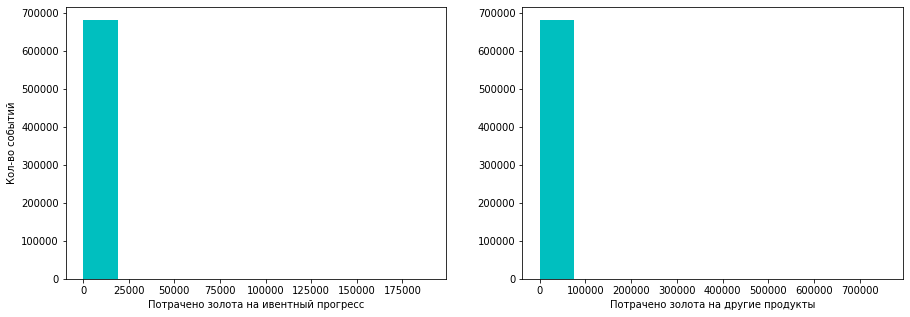

In [25]:
# посмотрим как распредлены игроки по количеству потраченого золота в игре
plt.figure(figsize=(15, 5))

ax1 = plt.subplot(1, 2, 1)
data_filtered['gold_on_event'].hist(color='c')
plt.xlabel('Потрачено золота на ивентный прогресс')
plt.ylabel('Кол-во событий')
plt.grid(False)

ax2 = plt.subplot(1, 2, 2, sharey=ax1)
data_filtered['gold_on_other_activities'].hist(color='c')
plt.xlabel('Потрачено золота на другие продукты')
plt.grid(False);

In [26]:
# посчитаем сколько в среднем золота тратили на ивентные продукты в пересчете на уникального пользоватнеля
data_filtered['gold_on_event_flag'] = (data_filtered['gold_on_event'] > 0) * 1
data_filtered['gold_on_other_activities_flag'] = (data_filtered['gold_on_other_activities'] > 0) * 1

for_bootstrap_data = data_filtered.groupby('ab_group')[['gold_on_event_flag','gold_on_event']]\
                              .agg({'gold_on_event_flag': 'count',
                                    'gold_on_event': 'mean'})\
                              .rename(columns={'gold_on_event_flag': 'game_events',
                                               'gold_on_event': 'mean_gold_spent'})
display(for_bootstrap_data)

,game_events,mean_gold_spent
ab_group,,
Control,546405,124.876786
Test,135243,130.905851


Так как мы заменили все NaN в исходных данных на нули, что в результате мы считаем среднее для всех пользователей (тех, кто сконвертировался, и тех, кто золото не тратил). С учетом конверсии, в тестовой группе среднее количество потраченного золота на событие больше, чем в контрольной.

In [27]:
# посчитает размеры групп и наблюдаемые различия в средних для проведения ММК
group_size = data_filtered['ab_group'].value_counts().values
base_diff = for_bootstrap_data.mean_gold_spent.max() - for_bootstrap_data.mean_gold_spent.min()

In [28]:
# ММК gold_on_event на 2000 семплах
n = 2000
result = []

for _ in tqdm(range(n)):
    Control = data_filtered.sample(group_size[0], replace=True)['gold_on_event'].mean()
    Test = data_filtered.sample(group_size[1], replace=True)['gold_on_event'].mean()
    result.append(np.abs(Control - Test) >= base_diff)
    
print('Вероятность случайно обнаружить наблюдаемые различия в gold_on_event: {:.2%}'.format(np.mean(result)))

  0%|          | 0/2000 [00:00<?, ?it/s]

Вероятность случайно обнаружить наблюдаемые различия в gold_on_event: 5.50%


При уровне значимости в 5% мы не можем достоверно утверждать, что наблюдаемые различия в среднем количестве потраченного на ивентные события золота различается между группами теста.

In [29]:
# посчитаем сколько в среднем золота тратили на другие продукты в пересчете на уникального пользоватнеля
for_bootstrap2_data = data_filtered.groupby('ab_group')[['gold_on_other_activities_flag','gold_on_other_activities']]\
                              .agg({'gold_on_other_activities_flag': 'count',
                                    'gold_on_other_activities': 'mean'})\
                              .rename(columns={'gold_on_other_activities_flag': 'game_events',
                                               'gold_on_other_activities': 'mean_gold_on_other_activities_spent'})
display(for_bootstrap2_data)

,game_events,mean_gold_on_other_activities_spent
ab_group,,
Control,546405,218.711578
Test,135243,250.721664


In [30]:
base_diff_2 = for_bootstrap2_data.mean_gold_on_other_activities_spent.max() - for_bootstrap2_data.mean_gold_on_other_activities_spent.min()

In [31]:
# ММК gold_on_other_activities на 2000 семплах
n = 2000
result_2 = []

for _ in tqdm(range(n)):
    Control = data_filtered.sample(group_size[0], replace=True)['gold_on_other_activities'].mean()
    Test = data_filtered.sample(group_size[1], replace=True)['gold_on_other_activities'].mean()
    result_2.append(np.abs(Control - Test) >= base_diff_2)
    
print('Вероятность случайно обнаружить наблюдаемые различия в gold_on_other_activities: {:.2%}'.format(np.mean(result_2)))

  0%|          | 0/2000 [00:00<?, ?it/s]

Вероятность случайно обнаружить наблюдаемые различия в gold_on_other_activities: 0.00%


❗ Обнаружены статистически значимые различия. В тестовой группе пользователи тратят больше золота на другие (не ивентные) продукты.

# Выводы

**РЕЗУЛЬТАТ: Фиксируем победу группы B (тестовой)**

Вид окошка покупки ивентовых продуктов <u>влияет</u> на поведение пользователей. Статистически не подтверждается, что игроки покупают больше ивентных продуктов, однако, игроки доставерно больше золота трятят на прочие покупки в игре.